In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# Load the dataset
url = "/content/drive/MyDrive/SPAM_SMS_DETECTION/spam.csv"
df = pd.read_csv(url, encoding='latin-1')

In [ ]:
# Drop unnecessary columns and rename the existing ones
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.columns = ['label', 'message']

In [ ]:
# Encode labels (ham: 0, spam: 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Text preprocessing with TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Define and train classifiers
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC()
}

In [ ]:
# Function to train, predict and evaluate models
def train_evaluate(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [ ]:
# Evaluate each classifier
results = {}
for name, clf in classifiers.items():
    accuracy, precision, recall, f1 = train_evaluate(clf, X_train_tfidf, y_train, X_test_tfidf, y_test)
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}


Naive Bayes - Accuracy: 0.9668, Precision: 1.0000, Recall: 0.7533, F1 Score: 0.8593
Logistic Regression - Accuracy: 0.9525, Precision: 0.9709, Recall: 0.6667, F1 Score: 0.7905
Support Vector Machine - Accuracy: 0.9767, Precision: 0.9921, Recall: 0.8333, F1 Score: 0.9058


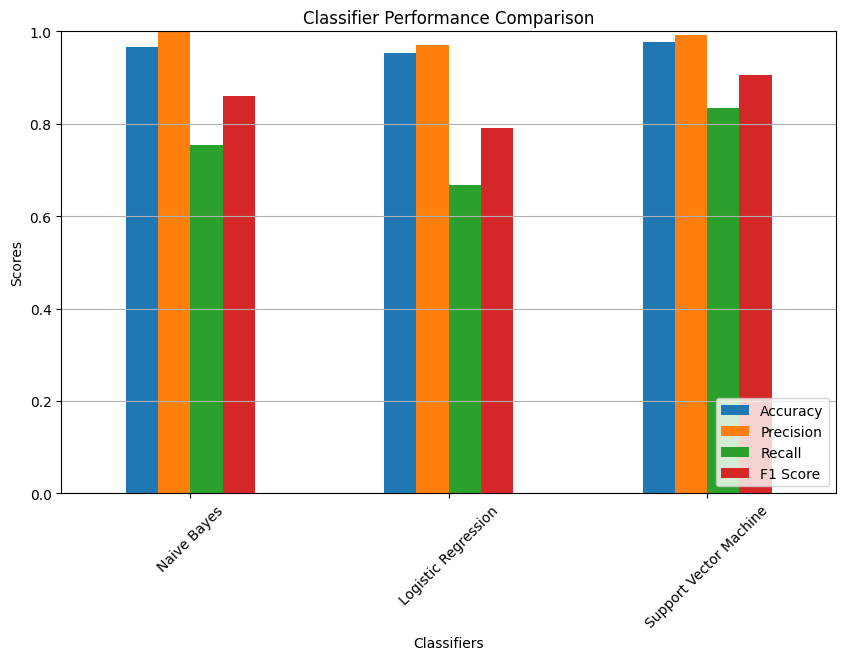

In [ ]:
# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results).T

# Plot the results
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Classifier Performance Comparison')
plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()